In [3]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

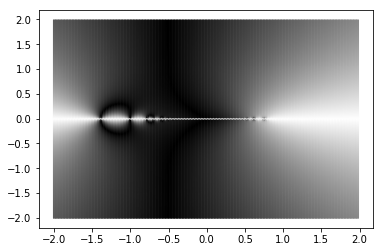

In [5]:

import numpy as np

# new grayscale alg from Thomas Baruchel
def grayify(complexes):
    h = np.angle(complexes) / (np.pi/2.0)
    h = np.abs(np.abs(h)-1.0)
    return [ str(g) for g in h]

def cf(num, den, z, limit, n=1):
# this isn't quite right
    if den(n,z) == 0: return 1 # to eliminate div0 problems. maybe
#    if n < limit : return den(n, z) + num(n+1, z)/cf(num,den,z,limit,n+1)
#    if n == limit : return den(n+1,z) 
    if n < limit: return den(n, z) + num(n+1, z)/cf(num,den,z,limit,n+1)
    if n == limit: return num(n, z)/den(n, z)


# calculates #181 from https://kettenreihen.wordpress.com/
# Probably not right, but result is a little evocative, at least
points = 100  # number of points in each direction
scale = 2.0     # max value domain 
r = range(-points,points) 
domain =  [x*scale/points + 1j*y*scale/points for x in r for y in r ]
values = [ cf(lambda n,z:z-n+1, lambda n,z:n*z,p,100) for p in domain]

grays = grayify(values)
plt.scatter(np.real(domain), np.imag(domain), s=1, color=grays)
plt.show()
